Библиотека numpy нужна для решения систем линейных уравнений и для использования тригонометрических функций;

matplotlib.pyplot - для строительства графиков.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Выбираем вариант (var) и инициализируем глобальную переменную (task), обозначающую номер задания.

In [2]:
var = 4
task = 1

Функция, возвращающая значение параметра а. Отличается в зависимости от номера задания.

In [3]:
def a(x):
    if task == 1:
        return 1
    elif task == 2:
        return np.sin(var)
    elif task == 3:
        return np.sin(var*x)

Аналогично с параметром b

In [4]:
def b(x):
    if task == 1:
        return 1
    elif task == 2:
        return np.cos(var)
    elif task == 3:
        return np.cos(var*x)

Функция, возвращающая значение функции p(x).

In [5]:
def p(x):
    return 1+b(x)*x**2

Функция, возвращающая значение функции f(x). Вынесена в отдельную функцию для того, чтобы при желании можно было легко её изменить.

In [6]:
def f(x):
    return -1

Функция, которая по заданному списку абсцисс (x_list) строит и решает систему линейных уравнений. Возвращает список ординат, представляющий собой решение. 

n - число разбиенй;

h - шаг;

out - если true, выводит матрицу и вектор; если false - нет.

## Пояснения к решению

Рассмотрим частный случай краевой задачи:

$ay'' - p(x)\cdot y = f(x) $

Заменим:

$y''_k = \dfrac{y_{k-1} - 2\cdot y_k + y_{k+1}}{h^2}$

Таким образом получим трёхдиагональную систему линейных уравнений:

$ay_{k-1} - (2 + h^2\cdot p(x))\cdot y_k + ay_{k+1} = h^2 \cdot f(x_k), k \in [1, n-1]$

Данная система легко решается методом прогонки.

In [7]:
def get_y_list(A, B, n, x_list, out):
    h = (B-A)/n
    m = []
    for i in range(1, n - 1):
        row = []
        if i > 1:
            for j in range(i - 2):
                row.append(0)
            row.append(a(x_list[i]))
        row.append(-2*a(x_list[i]) + h ** 2 * p(x_list[i]))
        if i < n - 2:
            row.append(a(x_list[i]))
            for j in range(i + 1, n - 2):
                row.append(0)
        m.append(row)
    if out is True:
        print("Матрица:")
        for row in m:
            print(row)
    v = [f(x) * h ** 2 for x in x_list[1:-1:]]
    if out is True:
        print("\nВектор:")
        for num in v:
            print(num)
    y_list = list(np.linalg.solve(m, v))
    y_list.insert(0, 0)
    y_list.append(0)
    return y_list

Зададим границы отрезка.

In [8]:
A = -1
B = 1

### Задание 1.

$y'' + (1+x^2)\cdot y = -1$

$-1 \le x \le 1$

$y(-1) = 0; y(1) = 0$

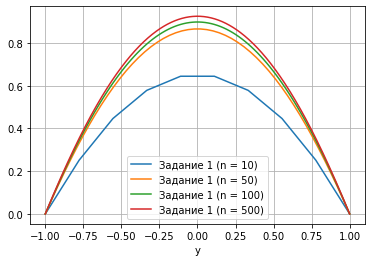

In [9]:
task = 1

for n in [10, 50, 100, 500]:
    x_list = np.linspace(A, B, n)
    y_list = get_y_list(A, B, n, x_list, False)
    #print("\nРезультат:")
    #for num in y_list:
    #    print(num)
    plt.plot(x_list, y_list, label="Задание 1 (n = %d)" % n)

plt.xlabel("x")
plt.xlabel("y")
plt.legend()
plt.grid()

### Задание 2.

$ay'' + (1+bx^2)\cdot y = -1$

$-1 \le x \le 1$

$y(-1) = 0; y(1) = 0$

$a = sin(4), b = cos(4)$

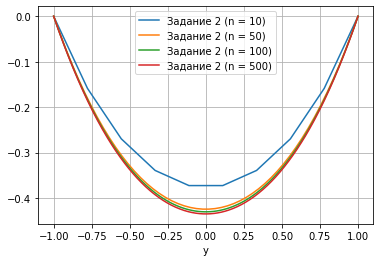

In [10]:
task = 2
for n in [10, 50, 100, 500]:
    x_list = np.linspace(A, B, n)
    y_list = get_y_list(A, B, n, x_list, False)
#    print("\nРезультат:")
#    for num in y_list:
#        print(num)
    plt.plot(x_list, y_list, label = "Задание 2 (n = %d)" % n)
plt.xlabel("x")
plt.xlabel("y")
plt.legend()
plt.grid()

### Задание со звёздочкой.

$ay'' + (1+bx^2)\cdot y = -1$

$-1 \le x \le 1$

$y(-1) = 0; y(1) = 0$

$a = sin(4x), b = cos(4x)$

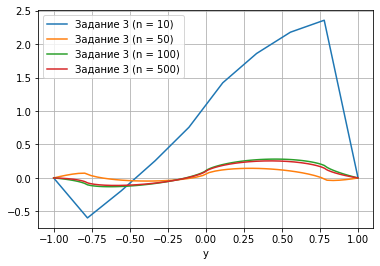

In [11]:
task = 3
for n in [10, 50, 100, 500]:
    x_list = np.linspace(A, B, n)
    y_list = get_y_list(A, B, n, x_list, False)
    #print("\nРезультат:")
    #for num in y_list:
        #print(num)
    plt.plot(x_list, y_list, label="Задание 3 (n = %d)" % n)
plt.xlabel("x")
plt.xlabel("y")
plt.legend()
plt.grid()

Все графики

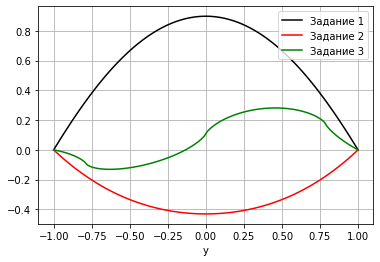

In [12]:
n =100
x_list = np.linspace(A, B, n)
task = 1
y_list = get_y_list(A, B, n, x_list, False)
plt.plot(x_list, y_list, label="Задание 1", color="black")
task = 2
y_list = get_y_list(A, B, n, x_list, False)
plt.plot(x_list, y_list, label="Задание 2", color="red")
task = 3
y_list = get_y_list(A, B, n, x_list, False)
plt.plot(x_list, y_list, label="Задание 3", color="green")
plt.xlabel("x")
plt.xlabel("y")
plt.legend()
plt.grid()